In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


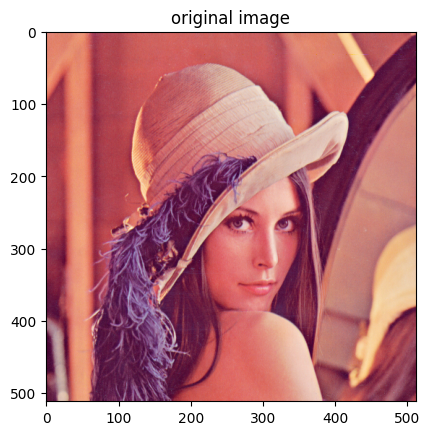

In [45]:
######## Image Read ######### 
imgScr = cv2.imread('lena.png')
imgRGB = cv2.cvtColor(imgScr, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('original image')
plt.imshow(imgRGB)  

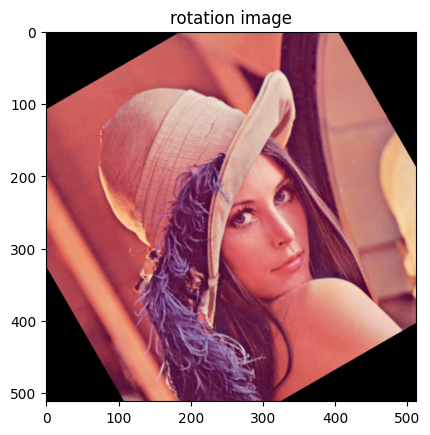

In [46]:
######### Rotation ######### 

# PARAMETER
ANGLE = 30

# PROCESS
image_center = tuple(np.array(imgRGB.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, ANGLE, 1.0)
result = cv2.warpAffine(imgRGB, rot_mat, imgRGB.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.figure()
plt.title('rotation image')
plt.imshow(result)


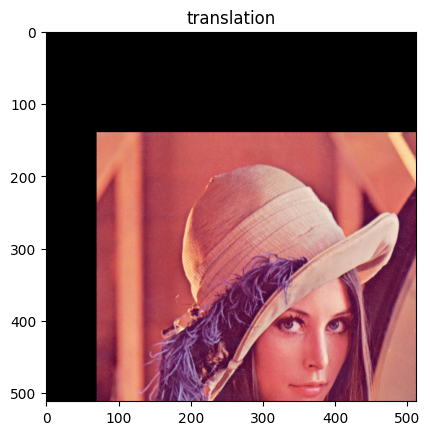

In [47]:
######### Translation #########
translation_matrix = np.float32([[1,0,70],[0,1,140]])
result = cv2.warpAffine(imgRGB,translation_matrix,imgRGB.shape[1::-1],flags=cv2.INTER_LINEAR)
plt.figure()
plt.title('translation')
plt.imshow(result)

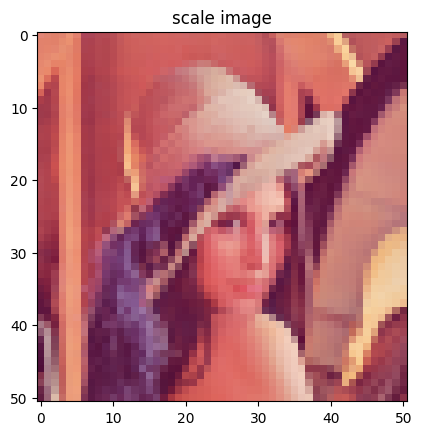

In [48]:
######### SCALE #########

scale_percent = 10       # percent of original size
width = int(imgRGB.shape[1] * scale_percent / 100)
height = int(imgRGB.shape[0] * scale_percent / 100)
dim = (width, height)
result = cv2.resize(imgRGB, dim, interpolation = cv2.INTER_AREA)
plt.figure()
plt.title('scale image')
plt.imshow(result)

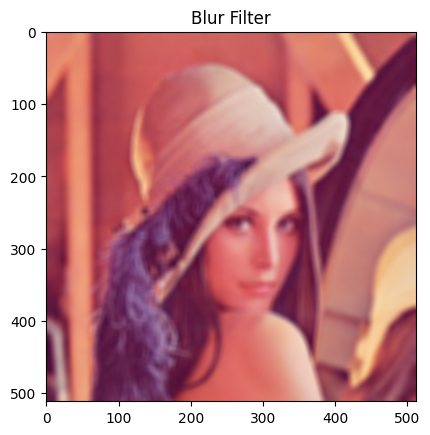

In [49]:
######## FILTER ########

# PARAMETTER
ksize = (10,10)

# PROCESS
result = cv2.blur(imgRGB,ksize)
plt.figure()
plt.title('Blur Filter')
plt.imshow(result)

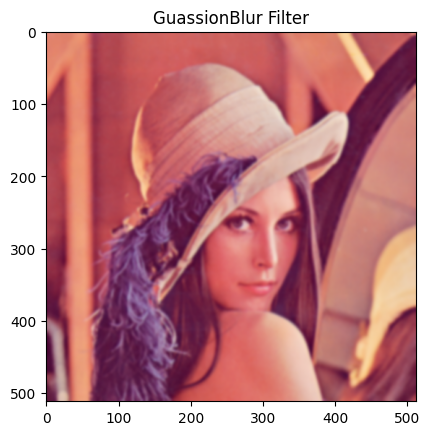

In [50]:
# PARAMETER
ksize = (9,9)
sigma = 0
result = cv2.GaussianBlur(imgRGB,ksize,sigma)
plt.figure()
plt.title('GuassionBlur Filter')
plt.imshow(result)

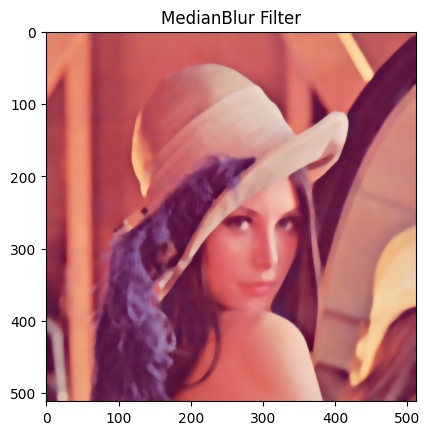

In [51]:
# PARAMETER
ksize = 9

result = cv2.medianBlur(imgRGB,ksize)
plt.figure()
plt.title('MedianBlur Filter')
plt.imshow(result)

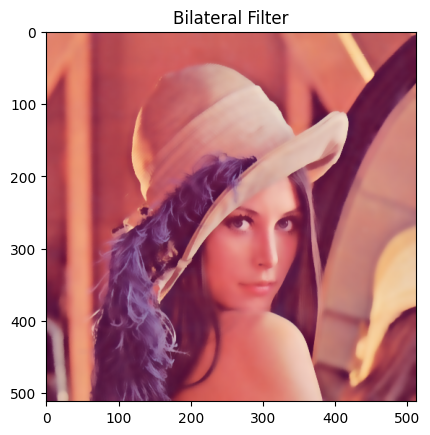

In [52]:
# PARAMETER
ksize = 10 
sigmaX = 100
sigmaY = 100

result = cv2.bilateralFilter(imgRGB,ksize,sigmaX,sigmaY)
plt.figure()
plt.title('Bilateral Filter')
plt.imshow(result)

(512, 512)


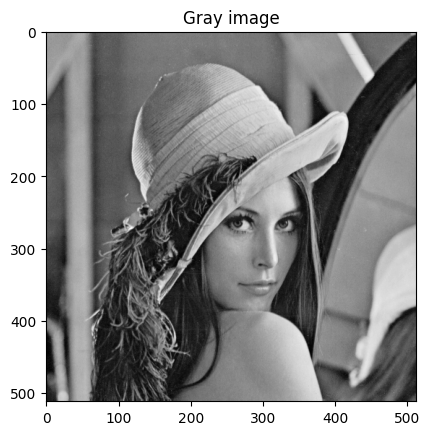

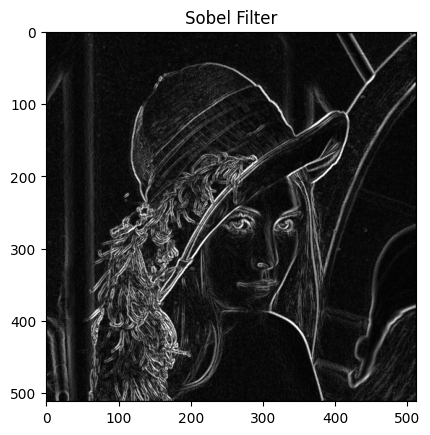

In [55]:
gray = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('Gray image')
plt.imshow(gray,cmap='gray')
x = cv2.Sobel(imgRGB,cv2.CV_16S,1,0)
y = cv2.Sobel(imgRGB,cv2.CV_16S,0,1)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
_result = cv2.addWeighted(absX,0.5,absY,0.5,0)
result = cv2.cvtColor(_result, cv2.COLOR_RGB2GRAY)
print(np.shape(result))
plt.figure()
plt.title('Sobel Filter')
plt.imshow(result,cmap='gray')

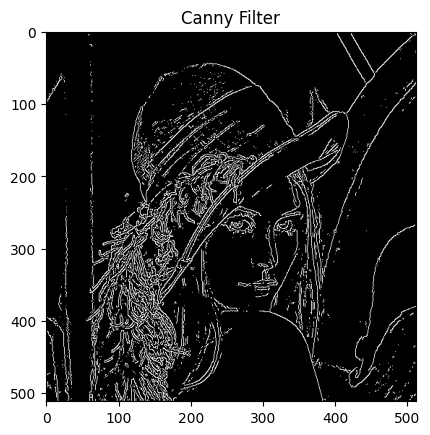

In [60]:
######### CANNY #########
_result = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
result = cv2.Canny(_result,100,100)
plt.figure()
plt.title('Canny Filter')
plt.imshow(result,cmap='gray')

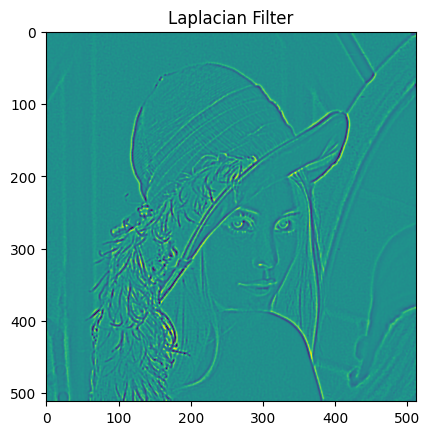

In [64]:
_result = cv2.cvtColor(imgScr, cv2.COLOR_BGR2GRAY)
result = cv2.Laplacian(_result,cv2.CV_16S,ksize = 7)
plt.figure()
plt.title('Laplacian Filter')
plt.imshow(result)